In [ ]:
%pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 7.7 MB/s eta 0:00:00


<Axes: >

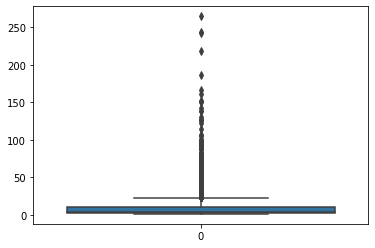

In [ ]:
sns.boxplot([k for k in scores if k >0])

## Sentiment Analysis

In [ ]:
import praw
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tqdm
from random import sample
import seaborn as sns

In [ ]:
import praw
from tqdm import tqdm

reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro choice', 'prochoice', 'pro abortion','pro-abortion']

comments = []
# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prochoice').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=150)):
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
      if comment.score > 10:
        comments.append(comment.body)

150it [04:32,  1.82s/it]


In [ ]:
len(comments)

556

In [ ]:
reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro life', 'prolife', 'anti abortion','anti-abortion']

comments2 = []
# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prolife').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=200)):
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
      if comment.score > 10:
        comments2.append(comment.body)

200it [01:02,  3.19it/s]


In [ ]:
len(comments2)

643

In [ ]:
comments = sample(comments,500)
comments2 = sample(comments2,500)

In [ ]:
pd.DataFrame({"Pro Choice":comments,"Pro Life":comments2})

,Pro Choice,Pro Life
0,"Seriously, dude? You. Have. No. Say. In. Any. ...",Based. I hope they can get human rights for al...
1,Thank you very much for your opinion. I always...,"Oh yeah, the self-hating types, I know them. I..."
2,It's probably done less quantifiable harm than...,[deleted]
3,They generalizing all “pro-aborts” but when a ...,"“Hmm yes, this floor seems to be made of floor.”"
4,> We do plan on having kids someday.\n\nWell I...,"Yeah, but if this were a right-wing group, hal..."
...,...,...
495,"What you think this says: ""I wouldn't make the...","Careful though, you might end up converting af..."
496,At least she didn’t come out of it “the only r...,Yeah they call us misogynist lmao…
497,It's kind of funny because they don't realize ...,You can always expect the worst with MSNBC. Ne...
498,I've been in that situation. I caused myself ...,This probably won't get a bunch of steam due t...


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.1 MB/s eta 0:00:00


In [ ]:
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj = SentimentIntensityAnalyzer()

In [ ]:
def get_cat(my_dict):  
  key_list = list(my_dict.keys())
  val_list = list(my_dict.values())

  position = val_list.index(max(val_list))
  return (key_list[position])

In [ ]:
pro_choice_categories = []
for i in comments:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  pro_choice_categories.append(get_cat(sentiment_dict))

In [ ]:
pro_life_categories = []
for i in comments2:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  pro_life_categories.append(get_cat(sentiment_dict))

In [ ]:
from collections import Counter

In [ ]:
print("For pro choice")
print(Counter(pro_choice_categories))
print("For pro life")
print(Counter(pro_life_categories))

For pro choice
Counter({'neu': 485, 'pos': 10, 'neg': 5})
For pro life
Counter({'neu': 476, 'pos': 14, 'neg': 10})


In [ ]:
pro_choice_df2 = pd.DataFrame({'Pro choice comments':comments,"Sentiment":pro_choice_categories})
pro_choice_df2.head()

,Pro choice comments,Sentiment
0,"Seriously, dude? You. Have. No. Say. In. Any. ...",neu
1,Thank you very much for your opinion. I always...,neu
2,It's probably done less quantifiable harm than...,neu
3,They generalizing all “pro-aborts” but when a ...,neu
4,> We do plan on having kids someday.\n\nWell I...,neu


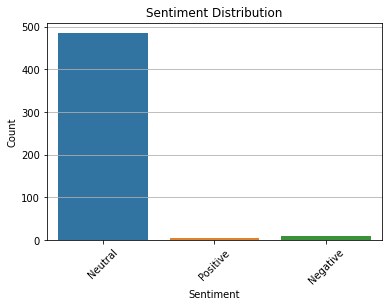

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='Sentiment', data=pro_choice_df2)

# set the title and axes labels
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

In [ ]:
pro_life_df3 = pd.DataFrame({'Pro life comments':comments2,"Sentiment":pro_life_categories})
pro_life_df3.head()

,Pro life comments,Sentiment
0,Based. I hope they can get human rights for al...,neu
1,"Oh yeah, the self-hating types, I know them. I...",neu
2,[deleted],neu
3,"“Hmm yes, this floor seems to be made of floor.”",neu
4,"Yeah, but if this were a right-wing group, hal...",neu


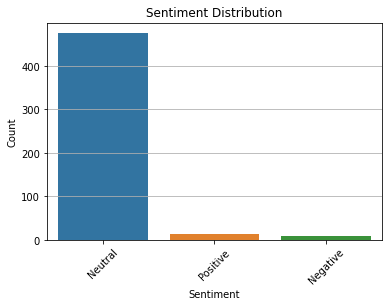

In [ ]:
ax = sns.countplot(x='Sentiment', data=pro_life_df3)

# set the title and axes labels
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Neutral', 'Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

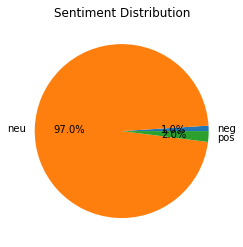

In [ ]:

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_choice_df2.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%')

# set the title
ax.set_title('Sentiment Distribution')

# show the plot
plt.show()


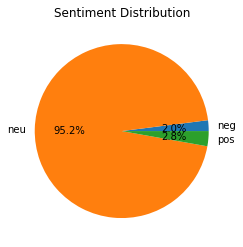

In [ ]:

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_life_df3.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots()
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%')

# set the title
ax.set_title('Sentiment Distribution')

# show the plot
plt.show()


In [ ]:
pro_choice_categories3 = []
for i in comments:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  del sentiment_dict['neu']
  pro_choice_categories3.append(get_cat(sentiment_dict))

In [ ]:
pro_life_categories4 = []
for i in comments2:
  sentiment_dict = sid_obj.polarity_scores(i)
  del sentiment_dict['compound']
  del sentiment_dict['neu']
  pro_life_categories4.append(get_cat(sentiment_dict))

In [ ]:
print("For pro choice")
print(Counter(pro_choice_categories3))
print("For pro life")
print(Counter(pro_life_categories4))

For pro choice
Counter({'neg': 303, 'pos': 197})
For pro life
Counter({'neg': 305, 'pos': 195})


In [ ]:
pro_choice_df5 = pd.DataFrame({'Pro choice comments':comments,"Sentiment":pro_choice_categories3})
pro_choice_df5.head()

,Pro choice comments,Sentiment
0,"Seriously, dude? You. Have. No. Say. In. Any. ...",neg
1,Thank you very much for your opinion. I always...,pos
2,It's probably done less quantifiable harm than...,neg
3,They generalizing all “pro-aborts” but when a ...,neg
4,> We do plan on having kids someday.\n\nWell I...,neg


In [ ]:
pro_life_df6 = pd.DataFrame({'Pro life comments':comments2,"Sentiment":pro_life_categories4})
pro_life_df6.head()

,Pro life comments,Sentiment
0,Based. I hope they can get human rights for al...,neg
1,"Oh yeah, the self-hating types, I know them. I...",pos
2,[deleted],neg
3,"“Hmm yes, this floor seems to be made of floor.”",pos
4,"Yeah, but if this were a right-wing group, hal...",pos


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pro_choice_df5['Sentiment'].value_counts()

neg    303
pos    197
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

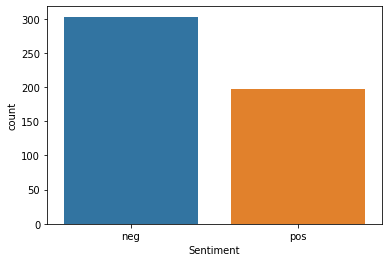

In [ ]:
sns.countplot(x='Sentiment',data=pro_choice_df5)

In [ ]:
pro_life_df6['Sentiment'].value_counts()

neg    305
pos    195
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

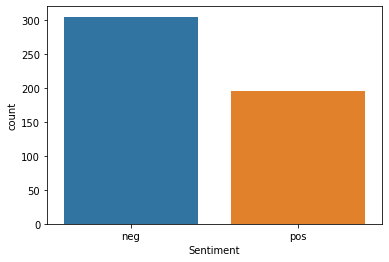

In [ ]:
sns.countplot(x='Sentiment',data=pro_life_df6)

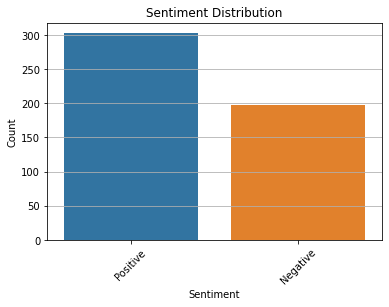

In [ ]:
ax = sns.countplot(x='Sentiment', data=pro_choice_df5)

# set the title and axes labels
ax.set_title('Sentiment Distribution for Pro Choice')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

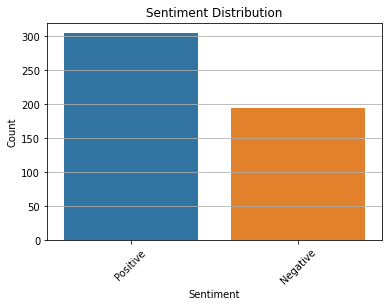

In [ ]:
ax = sns.countplot(x='Sentiment', data=pro_life_df6)

# set the title and axes labels
ax.set_title('Sentiment Distribution for Pro Life')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# customize the tick labels
ax.set_xticklabels(['Positive', 'Negative'])
ax.tick_params(axis='x', labelrotation=45)

# add grid lines
ax.grid(axis='y')

# show the plot
plt.show()

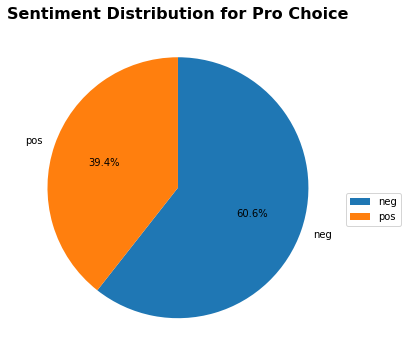

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_choice_df5.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%', startangle=90, counterclock=False)

# set the title and add a shadow
ax.set_title('Sentiment Distribution for Pro Choice', fontsize=16, fontweight='bold')
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(sentiment_counts['Sentiment'], loc='best', bbox_to_anchor=(1, 0.5))
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.8)
ax.axis('off')

# show the plot
plt.show()


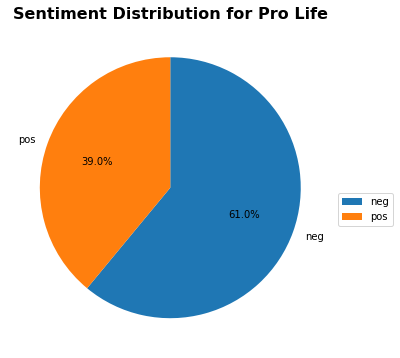

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# group the data by sentiment and count the number of rows in each group
sentiment_counts = pro_life_df6.groupby('Sentiment').size().reset_index(name='Count')

# create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sentiment_counts['Count'], labels=sentiment_counts['Sentiment'], autopct='%1.1f%%', startangle=90, counterclock=False)

# set the title and add a shadow
ax.set_title('Sentiment Distribution for Pro Life', fontsize=16, fontweight='bold')
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(sentiment_counts['Sentiment'], loc='best', bbox_to_anchor=(1, 0.5))
ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.8)
ax.axis('off')

# show the plot
plt.show()


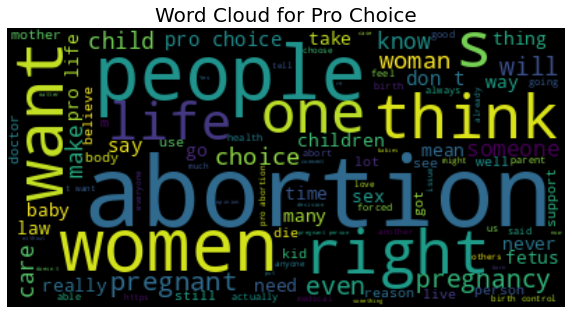

abortion: 1.0
people: 0.5298013245033113
women: 0.4900662251655629
want: 0.40728476821192056
s: 0.3741721854304636
right: 0.33774834437086093
think: 0.3344370860927152
one: 0.32781456953642385
life: 0.2814569536423841
pregnant: 0.2682119205298013


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all comments into a single string
comments = ' '.join(pro_choice_df5['Pro choice comments'].tolist())

# create a word cloud object with some customization
wordcloud = WordCloud(background_color='black', max_words=100, colormap='viridis').generate(comments)

# plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Pro Choice', fontsize=20)
plt.axis('off')
plt.show()

# get the top ten repeated words from the word cloud
word_freq = Counter(wordcloud.words_)
top_words = word_freq.most_common(10)

# print the top ten repeated words and their frequency
for word, freq in top_words:
    print(f'{word}: {freq}')

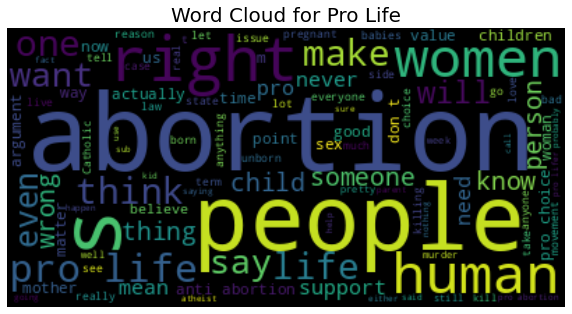

abortion: 1.0
people: 0.75
s: 0.5897435897435898
right: 0.5448717948717948
human: 0.42948717948717946
women: 0.42948717948717946
pro life: 0.4230769230769231
life: 0.3717948717948718
think: 0.358974358974359
one: 0.3525641025641026


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all comments into a single string
comments = ' '.join(pro_life_df6['Pro life comments'].tolist())

# create a word cloud object with some customization
wordcloud = WordCloud(background_color='black', max_words=100, colormap='viridis').generate(comments)

# plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Pro Life', fontsize=20)
plt.axis('off')
plt.show()

# get the top ten repeated words from the word cloud
word_freq = Counter(wordcloud.words_)
top_words = word_freq.most_common(10)

# print the top ten repeated words and their frequency
for word, freq in top_words:
    print(f'{word}: {freq}')

In [ ]:
reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
start_date = '2022-01-01'
end_date = '2023-03-25'
keywords = ['pro choice', 'prochoice', 'pro abortion','pro-abortion']


top_posts = []
top_comments = []

# Retrieve the 10 most recent submissions containing the search query
for submission in tqdm(reddit.subreddit('prochoice').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=300)):
    # Append the submission to the top_posts list if its score is greater than 10
    if submission.score > 10:
        top_posts.append(submission.title)
    # Print the top level comments for each submission
    submission.comments.replace_more(limit=0)
    for comment in submission.comments.list():
        # Append the comment to the top_comments list if its score is greater than 10
        if comment.score > 10:
            top_comments.append(comment.body)


23it [00:07,  4.55it/s]WARNING:prawcore:Retrying due to ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))) status: GET https://oauth.reddit.com/comments/vlg32b/
227it [01:03,  3.60it/s]


In [ ]:
len(top_comments)

794

## Topic Modeling

### LDA

In [ ]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
nltk.download('wordnet')
import gensim

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lem = WordNetLemmatizer()

#### Pro choice Positive Comments

In [ ]:
choice_pos_df = pro_choice_df[pro_choice_df['Sentiment']=='pos']
choice_pos_df.reset_index(inplace=True)

In [ ]:
clean_data = []
for i in tqdm(range(len(choice_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_pos_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data.append(sent)

100%|██████████| 186/186 [00:01<00:00, 173.15it/s]


In [ ]:
dictionary  = gensim.corpora.Dictionary(clean_data)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_data]

In [ ]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.016*"people" + 0.011*"abortion" + 0.007*"life" + 0.006*"pro" + 0.006*"well" + 0.004*"want" + 0.004*"think" + 0.004*"never" + 0.004*"extremist" + 0.004*"disabled"


Topic: 1 
Words: 0.024*"abortion" + 0.022*"pro" + 0.022*"life" + 0.010*"anti" + 0.010*"people" + 0.009*"would" + 0.008*"right" + 0.007*"like" + 0.006*"human" + 0.006*"much"


Topic: 2 
Words: 0.016*"woman" + 0.015*"like" + 0.013*"life" + 0.011*"pro" + 0.009*"abortion" + 0.009*"think" + 0.008*"want" + 0.007*"get" + 0.006*"child" + 0.005*"people"




#### Pro choice negative comments

In [ ]:
choice_neg_df = pro_choice_df[pro_choice_df['Sentiment']=='neg']
choice_neg_df.reset_index(inplace=True)

In [ ]:
clean_data = []
for i in tqdm(range(len(choice_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_neg_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data.append(sent)

100%|██████████| 314/314 [00:01<00:00, 204.99it/s]


In [ ]:
dictionary  = gensim.corpora.Dictionary(clean_data)
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_data]
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.032*"pro" + 0.017*"life" + 0.014*"abortion" + 0.013*"people" + 0.009*"make" + 0.008*"think" + 0.007*"choice" + 0.007*"like" + 0.007*"anti" + 0.006*"right"


Topic: 1 
Words: 0.018*"abortion" + 0.014*"life" + 0.012*"pro" + 0.011*"people" + 0.007*"someone" + 0.007*"would" + 0.005*"thing" + 0.005*"human" + 0.005*"even" + 0.005*"body"


Topic: 2 
Words: 0.016*"abortion" + 0.012*"people" + 0.011*"woman" + 0.009*"right" + 0.008*"human" + 0.007*"child" + 0.007*"rape" + 0.006*"also" + 0.005*"say" + 0.005*"make"




#### Pro Life positive comments

In [ ]:
life_pos_df = pro_life_df[pro_life_df['Sentiment']=='pos']
life_pos_df.reset_index(inplace=True)

In [ ]:
clean_data = []
for i in tqdm(range(len(life_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_pos_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data.append(sent)

100%|██████████| 218/218 [00:01<00:00, 119.06it/s]


In [ ]:
dictionary  = gensim.corpora.Dictionary(clean_data)
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_data]
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.015*"abortion" + 0.012*"http" + 0.009*"www" + 0.008*"baby" + 0.007*"mother" + 0.007*"life" + 0.006*"god" + 0.006*"com" + 0.006*"born" + 0.006*"like"


Topic: 1 
Words: 0.018*"life" + 0.015*"pro" + 0.013*"abortion" + 0.009*"like" + 0.008*"think" + 0.007*"woman" + 0.007*"child" + 0.007*"know" + 0.006*"baby" + 0.006*"people"


Topic: 2 
Words: 0.021*"life" + 0.020*"pro" + 0.014*"abortion" + 0.009*"woman" + 0.009*"like" + 0.006*"people" + 0.005*"thing" + 0.005*"choice" + 0.005*"one" + 0.005*"u"




#### Pro life negative comments

In [ ]:
life_neg_df = pro_life_df[pro_life_df['Sentiment']=='neg']
life_neg_df.reset_index(inplace=True)

In [ ]:
clean_data = []
for i in tqdm(range(len(life_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_neg_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    #sent = ' '.join(sent)
    clean_data.append(sent)

100%|██████████| 282/282 [00:01<00:00, 151.86it/s]


In [ ]:
dictionary  = gensim.corpora.Dictionary(clean_data)
bow_corpus = [dictionary.doc2bow(doc) for doc in clean_data]
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.016*"abortion" + 0.013*"pro" + 0.013*"people" + 0.012*"life" + 0.008*"woman" + 0.007*"right" + 0.005*"think" + 0.005*"like" + 0.005*"know" + 0.005*"get"


Topic: 1 
Words: 0.017*"abortion" + 0.016*"baby" + 0.013*"woman" + 0.009*"life" + 0.009*"pro" + 0.009*"would" + 0.006*"child" + 0.006*"mother" + 0.005*"white" + 0.005*"birth"


Topic: 2 
Words: 0.017*"pro" + 0.013*"abortion" + 0.013*"life" + 0.008*"child" + 0.007*"get" + 0.007*"woman" + 0.007*"gun" + 0.006*"kill" + 0.006*"like" + 0.006*"people"




### BERTopic

In [ ]:
from bertopic import BERTopic
from umap import UMAP

#### Pro choice positive comments

In [ ]:
clean_data = []
for i in tqdm(range(len(choice_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_pos_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data.append(sent)

100%|██████████| 186/186 [00:01<00:00, 169.37it/s]


In [ ]:
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(clean_data)

2023-03-25 02:45:46,438 - BERTopic - Transformed documents to Embeddings
2023-03-25 02:45:47,701 - BERTopic - Reduced dimensionality
2023-03-25 02:45:47,723 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.visualize_documents(clean_data)

#### Pro choice negative comments

In [ ]:
clean_data = []
for i in tqdm(range(len(choice_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',choice_neg_df['Pro choice comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data.append(sent)

umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(clean_data)

topic_model.visualize_documents(clean_data)

100%|██████████| 314/314 [00:02<00:00, 105.39it/s]
2023-03-25 02:54:40,298 - BERTopic - Transformed documents to Embeddings
2023-03-25 02:54:41,834 - BERTopic - Reduced dimensionality
2023-03-25 02:54:41,861 - BERTopic - Clustered reduced embeddings


#### Pro life positive comments

In [ ]:
clean_data = []
for i in tqdm(range(len(life_pos_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_pos_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data.append(sent)

umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(clean_data)

topic_model.visualize_documents(clean_data)

100%|██████████| 218/218 [00:01<00:00, 162.85it/s]
2023-03-25 02:56:48,965 - BERTopic - Transformed documents to Embeddings
2023-03-25 02:56:51,015 - BERTopic - Reduced dimensionality
2023-03-25 02:56:51,035 - BERTopic - Clustered reduced embeddings


#### Pro life negative comments

In [ ]:
clean_data = []
for i in tqdm(range(len(life_neg_df))):
    sent = re.sub('[^a-zA-Z]',' ',life_neg_df['Pro life comments'][i])
    sent = sent.lower()
    sent = sent.split()
    sent = [lem.lemmatize(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    clean_data.append(sent)

umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(clean_data)

topic_model.visualize_documents(clean_data)

100%|██████████| 282/282 [00:01<00:00, 173.15it/s]
2023-03-25 02:58:25,238 - BERTopic - Transformed documents to Embeddings
2023-03-25 02:58:26,724 - BERTopic - Reduced dimensionality
2023-03-25 02:58:26,751 - BERTopic - Clustered reduced embeddings


## Time line Analysis

### Pro choice

In [ ]:
quarters = [['2022-01-01','2022-04-01'],['2022-04-01','2022-07-01'],['2022-07-01','2022-10-01'],['2022-10-01','2023-01-01']]

In [ ]:
import praw
from tqdm import tqdm
final = []
reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
for q in quarters:
  start_date = q[0]
  end_date = q[1]
  keywords = ['pro choice', 'prochoice', 'pro abortion','pro-abortion']

  comments = []
  # Retrieve the 10 most recent submissions containing the search query
  for submission in tqdm(reddit.subreddit('prochoice').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=150)):
      # Print the top level comments for each submission
      submission.comments.replace_more(limit=0)
      for comment in submission.comments.list():
        if comment.score > 10:
          comments.append(comment.body)
  final.append(comments)

150it [01:59,  1.25it/s]
150it [03:00,  1.20s/it]
150it [07:03,  2.82s/it]
150it [03:26,  1.38s/it]


In [ ]:
for i in range(len(final)):
  final[i] = sample(final[i],500)

In [ ]:
sid_obj = SentimentIntensityAnalyzer()

In [ ]:
final_labels = []
for j in final:  
  pro_choice_categories = []
  for i in j:
    sentiment_dict = sid_obj.polarity_scores(i)
    del sentiment_dict['compound']
    del sentiment_dict['neu']
    pro_choice_categories.append(get_cat(sentiment_dict))
  final_labels.append(pro_choice_categories)

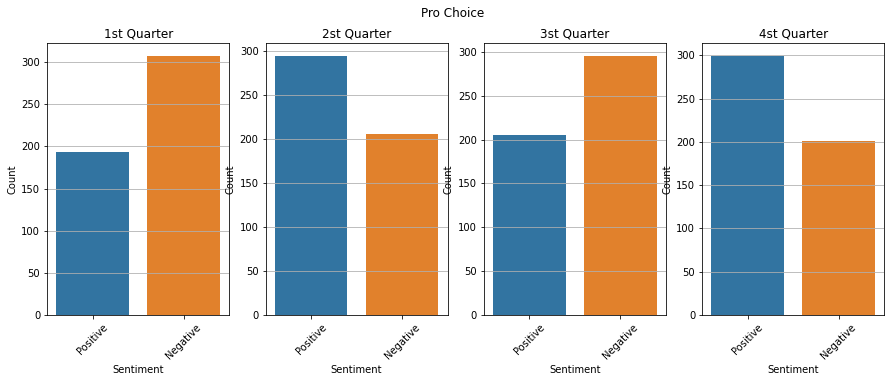

In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
fig.suptitle('Pro Choice')
for i in range(4):
  sns.countplot(ax=axes[i],x='Sentiment', data=pd.DataFrame({'Pro Choice':final[i],'Sentiment':final_labels[i]}))

  # set the title and axes labels
  axes[i].set_title('{}st Quarter'.format(i+1))
  axes[i].set_xlabel('Sentiment')
  axes[i].set_ylabel('Count')

  # customize the tick labels
  axes[i].set_xticklabels(['Positive', 'Negative'])
  axes[i].tick_params(axis='x', labelrotation=45)

  # add grid lines
  axes[i].grid(axis='y')

### Pro Life

In [ ]:
import praw
from tqdm import tqdm
final = []
reddit = praw.Reddit(client_id='vRFsmaYOnvjebJDT-KVbng', client_secret='m4Oh1xZxWRI1Y532xc8hRm71dPhpVA', user_agent='Jerin Thomas',check_for_async=False)
for q in quarters:
  start_date = q[0]
  end_date = q[1]
  keywords = ['pro life', 'prolife', 'anti abortion','anti-abortion']

  comments = []
  # Retrieve the 10 most recent submissions containing the search query
  for submission in tqdm(reddit.subreddit('prolife').search(f'{keywords}',f'during:{start_date}..{end_date}', limit=150)):
      # Print the top level comments for each submission
      submission.comments.replace_more(limit=0)
      for comment in submission.comments.list():
        if comment.score > 10:
          comments.append(comment.body)
  final.append(comments)

150it [06:26,  2.58s/it]
150it [03:10,  1.27s/it]
150it [06:54,  2.76s/it]
150it [03:47,  1.52s/it]


In [ ]:
for i in range(len(final)):
  final[i] = sample(final[i],500)

In [ ]:
sid_obj = SentimentIntensityAnalyzer()

In [ ]:
final_labels = []
for j in final:  
  pro_choice_categories = []
  for i in j:
    sentiment_dict = sid_obj.polarity_scores(i)
    del sentiment_dict['compound']
    del sentiment_dict['neu']
    pro_choice_categories.append(get_cat(sentiment_dict))
  final_labels.append(pro_choice_categories)

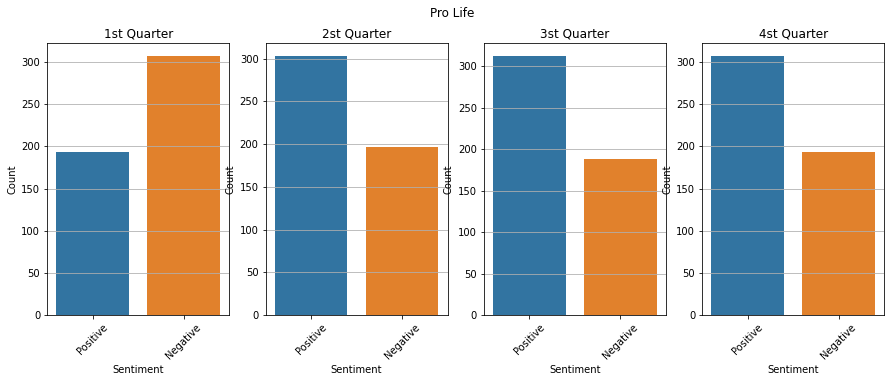

In [ ]:
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
fig.suptitle('Pro Life')
for i in range(4):
  sns.countplot(ax=axes[i],x='Sentiment', data=pd.DataFrame({'Pro Choice':final[i],'Sentiment':final_labels[i]}))

  # set the title and axes labels
  axes[i].set_title('{}st Quarter'.format(i+1))
  axes[i].set_xlabel('Sentiment')
  axes[i].set_ylabel('Count')

  # customize the tick labels
  axes[i].set_xticklabels(['Positive', 'Negative'])
  axes[i].tick_params(axis='x', labelrotation=45)

  # add grid lines
  axes[i].grid(axis='y')